In [155]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [156]:
# Load the dataset from the GitHub repository
url = 'https://raw.githubusercontent.com/ib-frida/FUSAL-Case-Study-Analysis/refs/heads/main/Chronic_malnutrition_Anemia.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())


            Chronic Malnutrition Unnamed: 1  Unnamed: 2  Unnamed: 3  \
0  National rural average: 21.2%        NaN         NaN         NaN   
1                            NaN        NaN         NaN         NaN   
2                      Community   Baseline      2014.0      2015.0   
3                 Apaneca (2004)         47        14.0         7.0   
4                   Ataco (2007)         49        15.0        14.0   

   Unnamed: 4  Unnamed: 5  
0         NaN         NaN  
1         NaN         NaN  
2      2016.0      2017.0  
3        16.4        19.7  
4        13.7        12.4  


In [157]:
# Clean the dataset (example: removing rows with missing values)
df_cleaned = df.dropna()

# Display the cleaned dataframe
print(df_cleaned.head())

  Chronic Malnutrition Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
2            Community   Baseline      2014.0      2015.0      2016.0   
3       Apaneca (2004)         47        14.0         7.0        16.4   
4         Ataco (2007)         49        15.0        14.0        13.7   
5    San Julián (2005)         37        12.5        10.0        13.7   
6     Guaymango (2008)         41        23.0        27.0        21.5   

   Unnamed: 5  
2      2017.0  
3        19.7  
4        12.4  
5        13.0  
6        23.4  


In [158]:

# Rename the columns in the dataframe
df_cleaned.rename(columns={'Unnamed: 1': 'Baseline', 'Unnamed: 2': '2014', 'Unnamed: 3': '2015','Unnamed: 4': '2016' ,'Unnamed: 5': '2017'}, inplace=True)

# Remove the year from the community names
df_cleaned['Chronic Malnutrition'] = df_cleaned['Chronic Malnutrition'].str.replace(r'\s*\(.*\)', '', regex=True)

# Display the renamed dataframe
print(df_cleaned.head())


  Chronic Malnutrition  Baseline    2014    2015    2016    2017
2            Community  Baseline  2014.0  2015.0  2016.0  2017.0
3              Apaneca        47    14.0     7.0    16.4    19.7
4                Ataco        49    15.0    14.0    13.7    12.4
5           San Julián        37    12.5    10.0    13.7    13.0
6            Guaymango        41    23.0    27.0    21.5    23.4


C:\Users\ifrid\AppData\Local\Temp\ipykernel_18548\2290347116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={'Unnamed: 1': 'Baseline', 'Unnamed: 2': '2014', 'Unnamed: 3': '2015','Unnamed: 4': '2016' ,'Unnamed: 5': '2017'}, inplace=True)
C:\Users\ifrid\AppData\Local\Temp\ipykernel_18548\2290347116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Chronic Malnutrition'] = df_cleaned['Chronic Malnutrition'].str.replace(r'\s*\(.*\)', '', regex=True)


In [159]:
# Eliminate duplicated names, such as "Baseline"
df_cleaned = df_cleaned[df_cleaned['Chronic Malnutrition'] != 'Community']

# Display the dataframe after removing duplicates
print(df_cleaned.head())

  Chronic Malnutrition Baseline  2014  2015  2016  2017
3              Apaneca       47  14.0   7.0  16.4  19.7
4                Ataco       49  15.0  14.0  13.7  12.4
5           San Julián       37  12.5  10.0  13.7  13.0
6            Guaymango       41  23.0  27.0  21.5  23.4
7      Cluster Morazan       24  21.0  18.5  16.0  12.8


In [160]:
# Exclude the 'Baseline' column
df_no_baseline = df_cleaned.drop(columns=['Baseline'])

# Calculate basic statistics
basic_stats_no_baseline = df_no_baseline.describe()

# Display the basic statistics
print(basic_stats_no_baseline)

            2014       2015       2016       2017
count  12.000000  12.000000  12.000000  12.000000
mean   22.291667  14.091667  15.083333  15.291667
std     8.400374   8.169284   5.398288   5.911539
min    12.500000   4.000000   7.000000   6.600000
25%    18.750000   8.500000  10.750000  12.100000
50%    21.500000  13.300000  14.850000  12.900000
75%    23.000000  18.125000  17.150000  17.150000
max    45.000000  30.000000  26.000000  28.200000


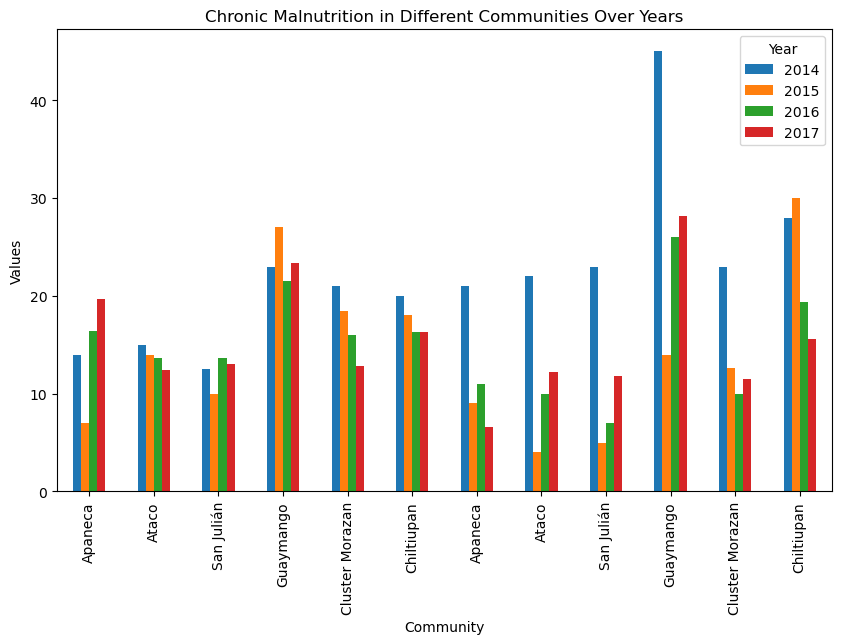

In [161]:
# Plot a bar graph of the communities
df_cleaned.plot(kind='bar', x='Chronic Malnutrition', y=['2014', '2015', '2016', '2017'], figsize=(10, 6))

# Add labels and title
plt.xlabel('Community')
plt.ylabel('Values')
plt.title('Chronic Malnutrition in Different Communities Over Years')
plt.legend(title='Year')

# Display the plot
plt.show()

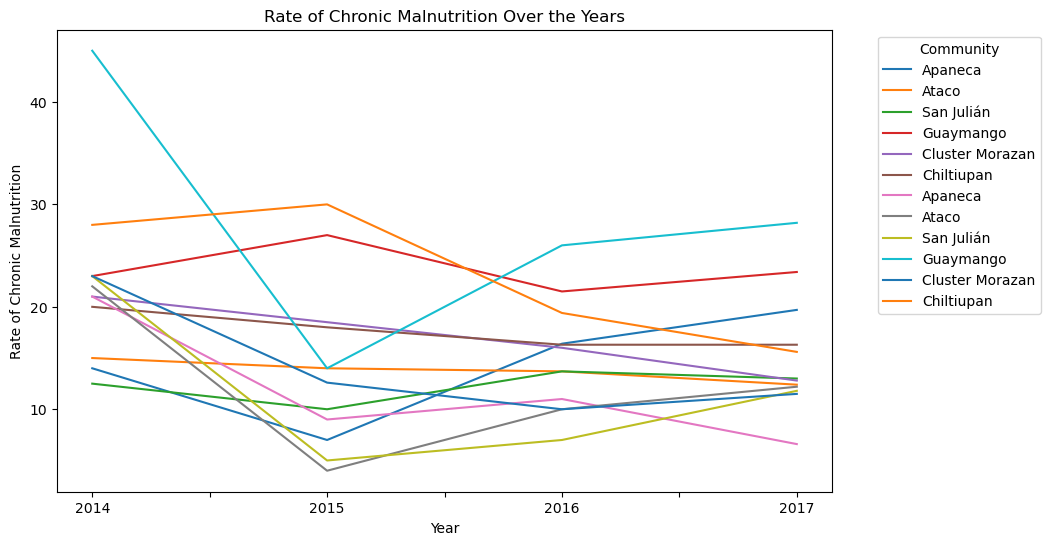

In [162]:
# Plot the rate of chronic malnutrition over the years
df_cleaned.set_index('Chronic Malnutrition')[['2014', '2015', '2016', '2017']].T.plot(figsize=(10, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rate of Chronic Malnutrition')
plt.title('Rate of Chronic Malnutrition Over the Years')
plt.legend(title='Community', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

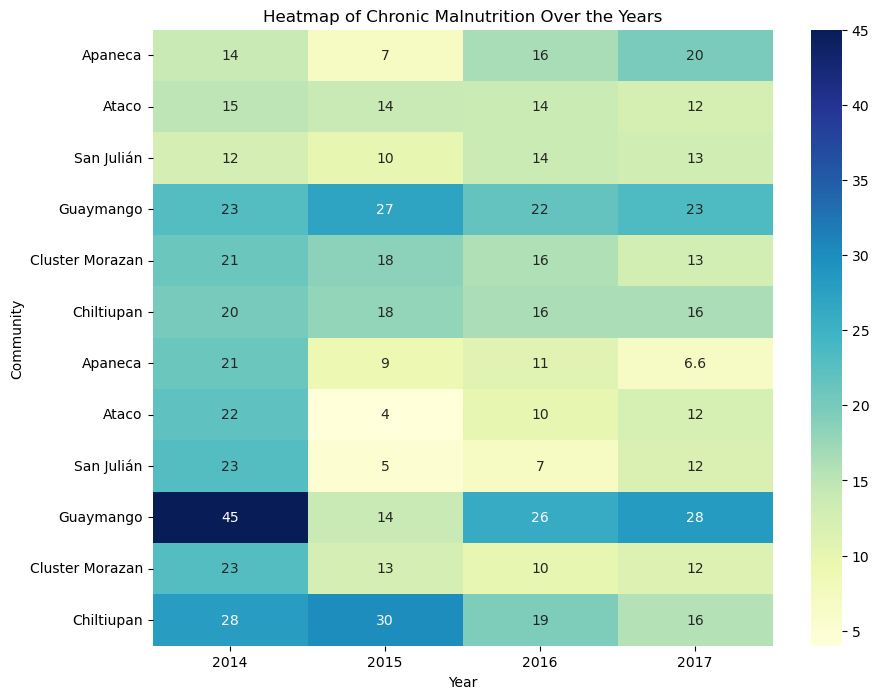

In [163]:
# Set the index to 'Chronic Malnutrition' for better visualization
df_heatmap = df_cleaned.set_index('Chronic Malnutrition')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap[['2014', '2015', '2016', '2017']], annot=True, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Community')
plt.title('Heatmap of Chronic Malnutrition Over the Years')

# Display the heatmap
plt.show()